## 1. Variable Identification
- **Numerical**
    - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit - **Discrete**
    - X5: Age (year) - **Discrete**
    - X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005 - **Discrete**
    - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005 - **Discrete**
- **Categorical**
    - **Y: default payment (Yes = 1, No = 0) - Target Variable/Nominal**
    - X2: Gender (1 = male; 2 = female) - **Nominal**
    - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) - **Nominal/Ordinal**
    - X4: Marital status (1 = married; 2 = single; 3 = others) - **Nominal**
    - X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above - **Nominal/Ordinal**

In [1]:
# ---------------------- import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----------------------- import dataset
data = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Classification\\CreditDefault\\default-of-credit-card-clients.csv', skiprows = 1)
data = data[:]

In [3]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
data.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'def_pay']

In [5]:
# ------------------------ variables
num_data = ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
            'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
cat_data = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
target = 'def_pay'

In [27]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            30000 non-null  int64
 1   LIMIT_BAL     30000 non-null  int64
 2   SEX           30000 non-null  int64
 3   EDUCATION     30000 non-null  int64
 4   MARRIAGE      30000 non-null  int64
 5   AGE           30000 non-null  int64
 6   PAY_SEP       30000 non-null  int64
 7   PAY_AUG       30000 non-null  int64
 8   PAY_JUL       30000 non-null  int64
 9   PAY_JUN       30000 non-null  int64
 10  PAY_MAY       30000 non-null  int64
 11  PAY_APR       30000 non-null  int64
 12  BILL_AMT_SEP  30000 non-null  int64
 13  BILL_AMT_AUG  30000 non-null  int64
 14  BILL_AMT_JUL  30000 non-null  int64
 15  BILL_AMT_JUN  30000 non-null  int64
 16  BILL_AMT_MAY  30000 non-null  int64
 17  BILL_AMT_APR  30000 non-null  int64
 18  PAY_AMT_SEP   30000 non-null  int64
 19  PAY_AMT_AUG   30000 non-n

**Observations**
- The dataset consists of 25 columns and 30000 distinct credit clients. Of the 25 columns, 23 are explanatory variables, a target variable, and an ID variable.
- Each categorical variable has already been label encoded.
- There are no missing values.

In [8]:
# ----------------------- Summary statistics of numerical variables
data[num_data].describe()

,LIMIT_BAL,AGE,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


**Observations**
- The highest credit limit balance is 1000000 and the lowest is 10000.
- The average age is 35

## 2. Non-graphical univariate analysis

In [9]:
# ----------------------- unique values in categorical variables
data[cat_data].nunique()

SEX           2
EDUCATION     7
MARRIAGE      4
PAY_SEP      11
PAY_AUG      11
PAY_JUL      11
PAY_JUN      11
PAY_MAY      10
PAY_APR      10
dtype: int64

In [10]:
# ------------------------ distribution of target variables
data[target].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

In [11]:
data['PAY_SEP'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_SEP, dtype: int64

**Observations**
- History of past payments (PAY_1 - PAY_6) contains categories ranging from -2 to 8. The original source does not state what -2 or 0 represent. Through further investigation the following was found,
    - -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
    - SOURCE: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608

### Understanding Payment Status
- Try to understand the relationship bewteen Payment Status, Bill Amount Statment and Payment Amount

In [26]:
data.iloc[:, 6:].head()

,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,def_pay
0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3. Graphical univariate analysis

In [12]:
def cat_dist(cat_col):
    fig, axes = plt.subplots(3, 3, figsize=(40, 25))
    axes = axes.flatten()
    for col, axe in zip(cat_col, axes):
        s = data.groupby(col)['def_pay'].value_counts()
        s.unstack().plot(kind= 'bar', stacked = True, ax = axe)
        plt.tight_layout()
        for p in axe.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            axe.text(x+width/2, y+height/2, f"{height:.2f}", ha ='center', va='center')
            #axe.annotate(f"{p.get_height()/len(data):.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [13]:
def cat_prop(cat_col):
    fig, axes = plt.subplots(3, 3, figsize=(40, 25))
    axes = axes.flatten()
    for col, axe in zip(cat_col, axes):
        s = data.groupby(col)['def_pay'].value_counts(normalize = True)
        s.unstack().plot(kind= 'bar', stacked = True, ax = axe)
        plt.tight_layout()
        for p in axe.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            axe.text(x+width/2, y+height/2, f"{height:.0%}", ha ='center', va='center')
            #axe.annotate(f"{p.get_height()/len(data):.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

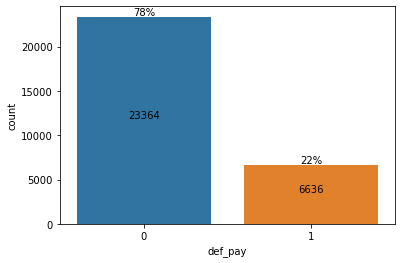

In [14]:
tplot = sns.countplot(x = data['def_pay'])
for p in tplot.patches:
    tplot.annotate(f"{p.get_height()/len(data):.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    tplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

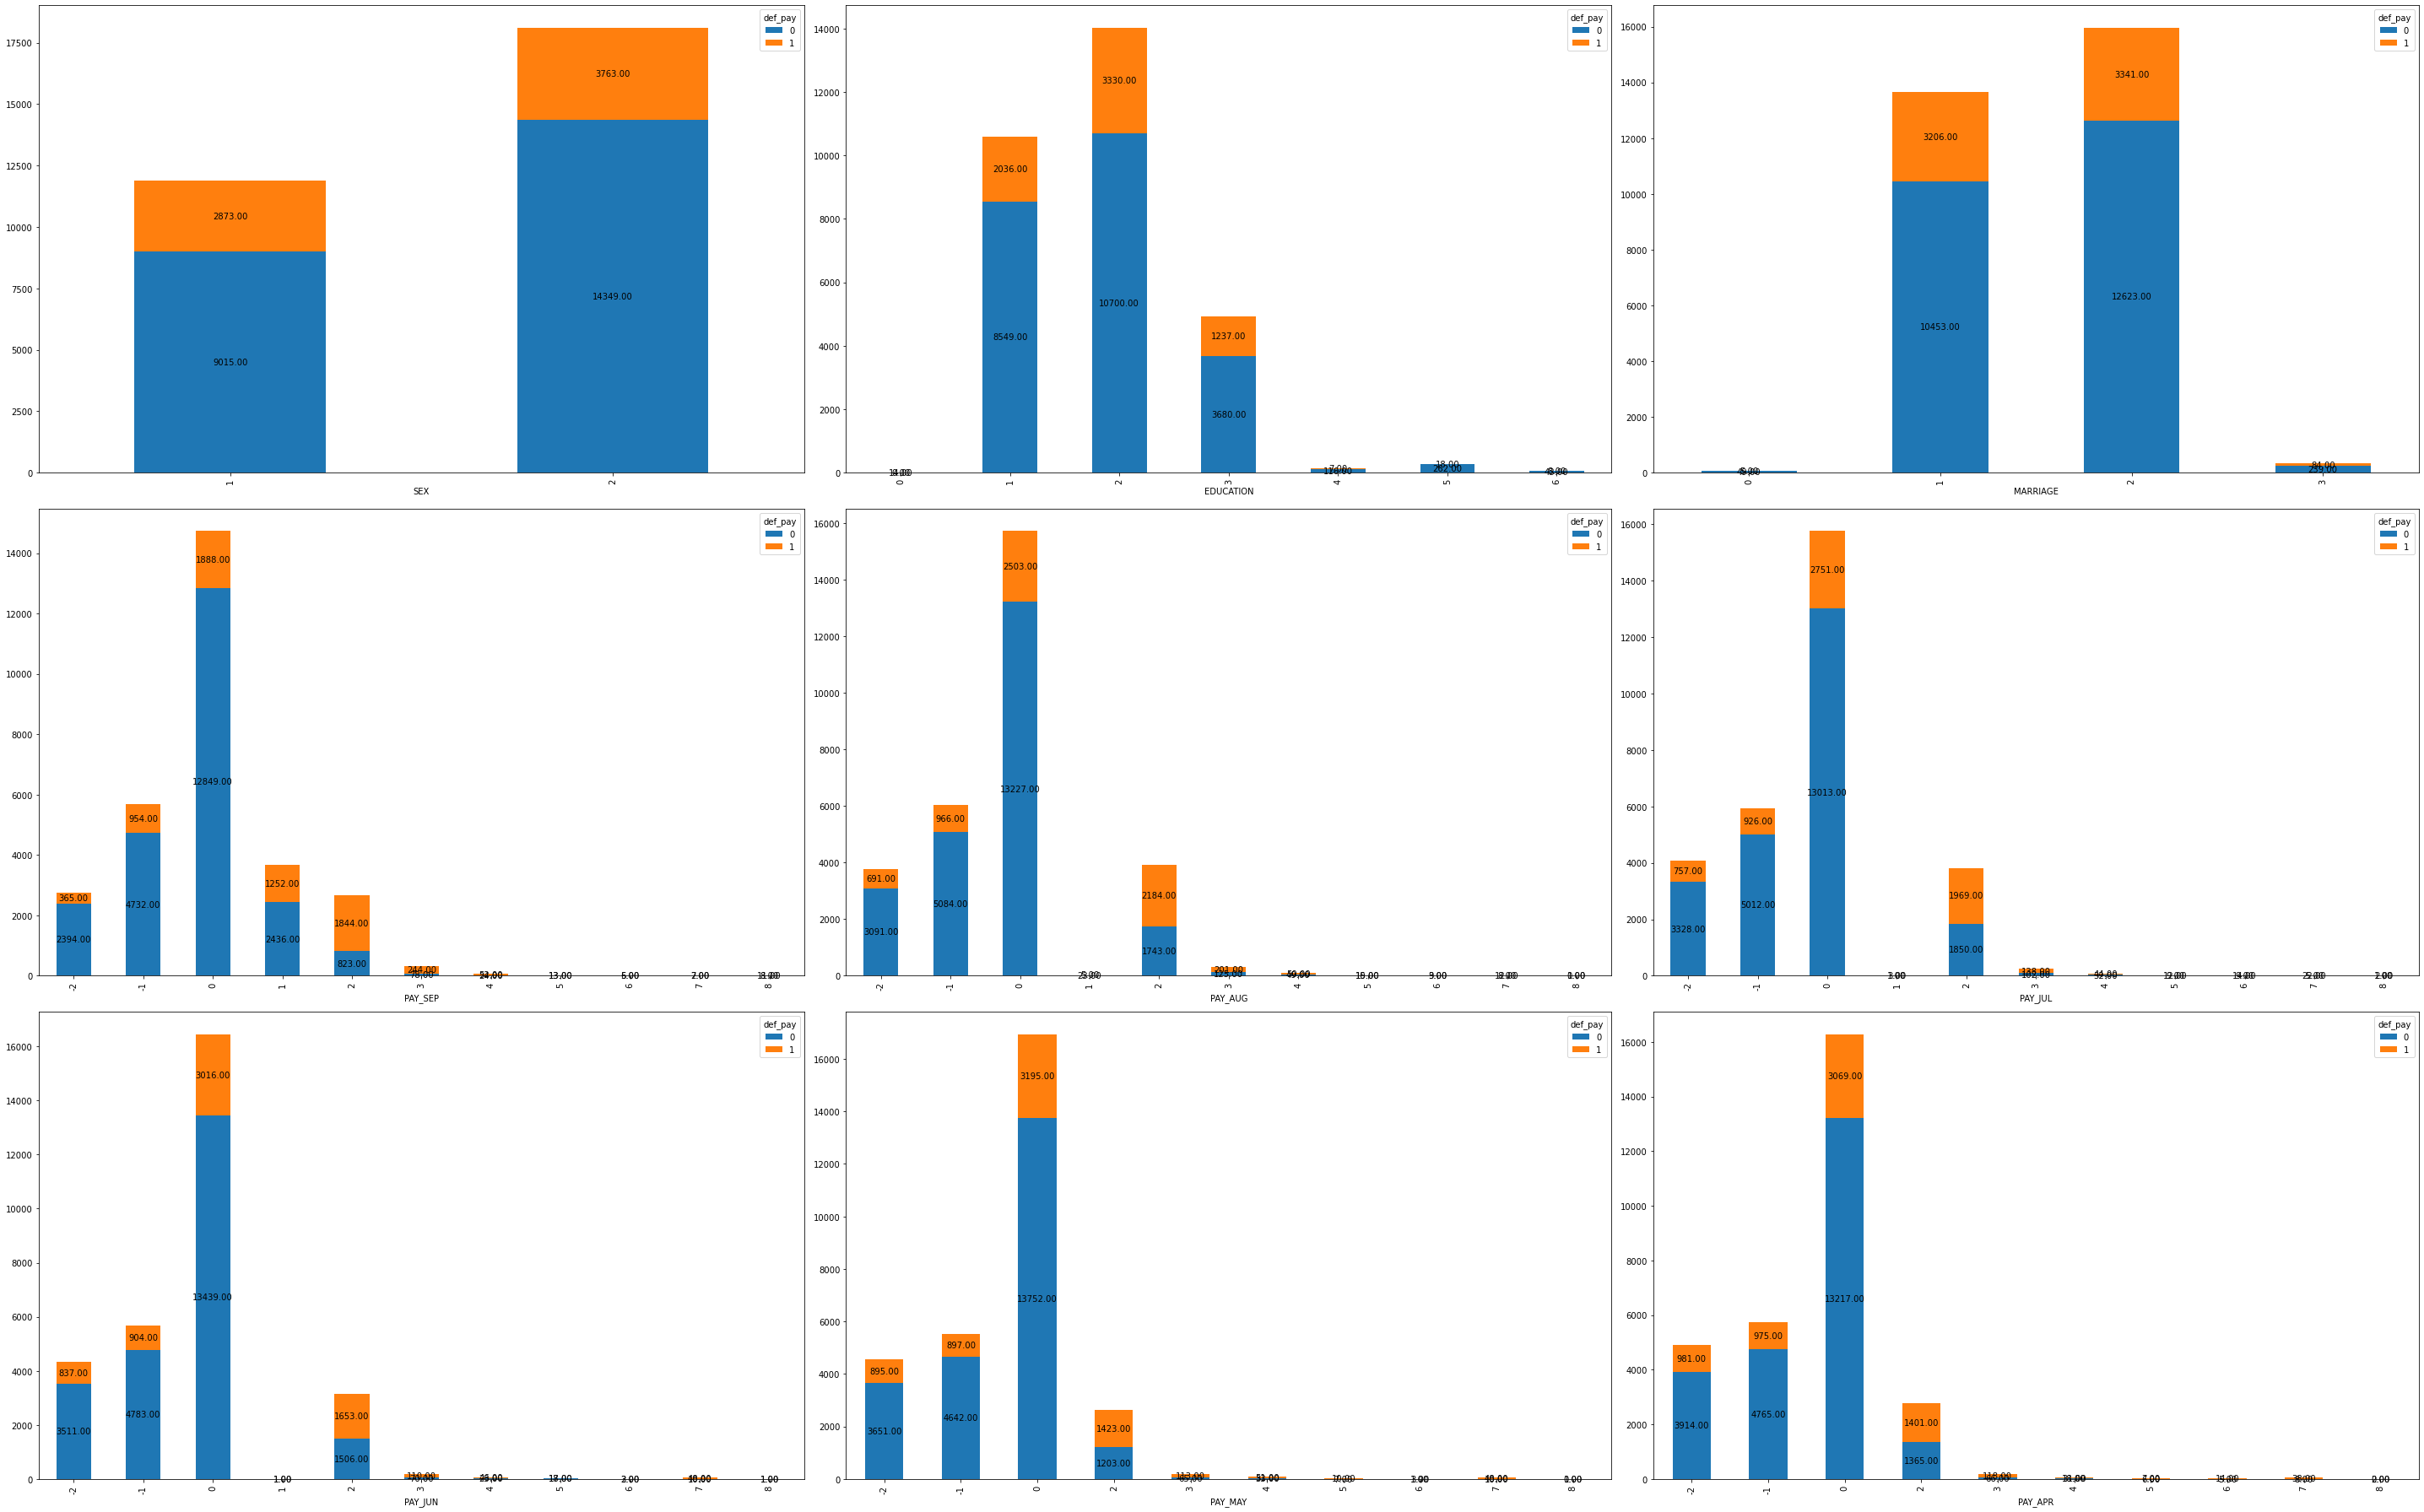

In [15]:
cat_dist(cat_data)

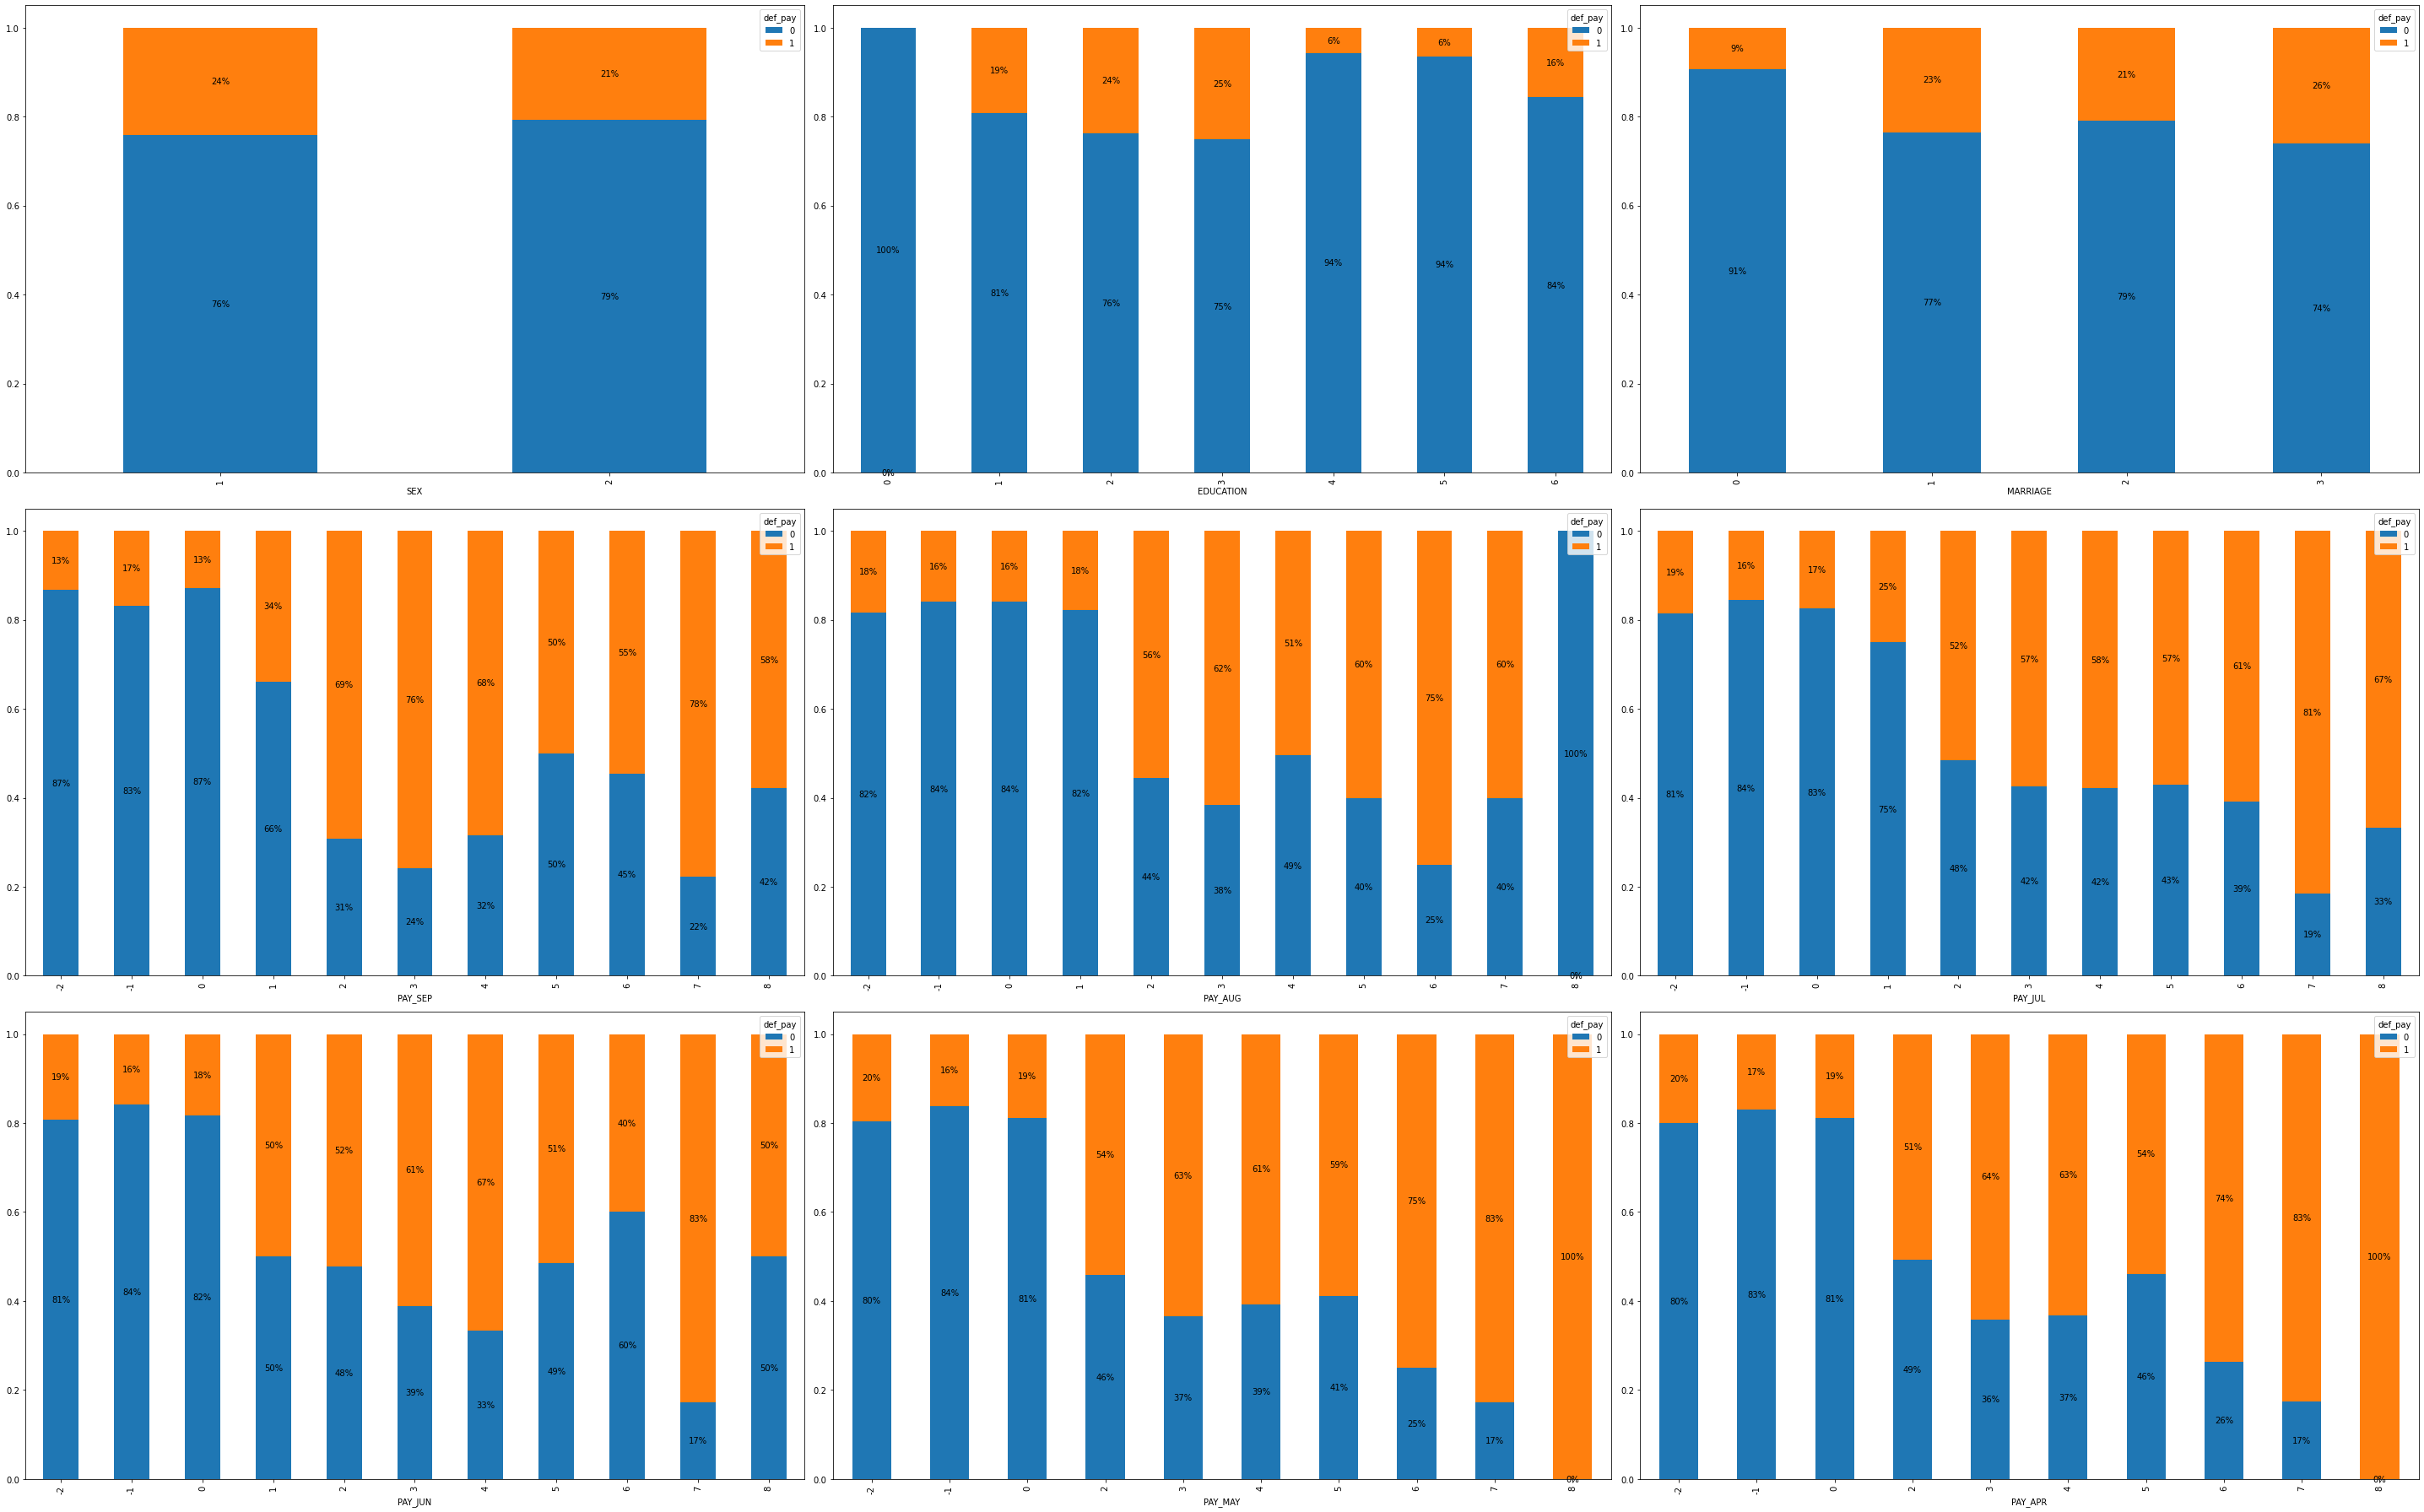

In [16]:
cat_prop(cat_data)

**Observations**
- The target variable is imbalanced. It contains significantly less defaults than non-defaults. This will pose a challenge when we conduct a predictive analysis.
- The sex category shows that there are slightly more females (60%) than males (40%) represented in this dataset. In proportion to their sex,  more males (24%) default than females (21%).
- The education category shows that there are most people represented have at least a high school degree. However there are some undocumented categories (0, 5, 6). Further investigation from the original source does not make it clear what these are and so require a different solution. Defaults are most common among university students. 
- The marriage category shows that there are slightly more singles than married couples represented in this dataset, and very few being otherwise. Just as with education there is an undocumented category (0). There does not seem to be a significant difference between married and single individuals concerning credit card default.
- The use of revolving credit (0) is clearly the most prevelant payment status, followed by individuals who pay in full and on time (1, pay duly). There also appears to be a decent number of people who do not use their credit cards at all (-2 no consumption). This could be a challenge for the bank if these individuals decide to churn. Very few individuals tend to delay their payments.
- The history of payment plots show that most people rarely delay payment beyond 3 months. However it can also be seen that proportionaly, the longer the delay the more likely an individual is to default.
- Overall, there does not seem to be a clear relationship between the categorical variables and default.

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

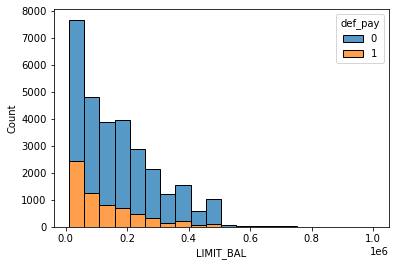

In [17]:
sns.histplot(x = data['LIMIT_BAL'], hue = data[target], multiple = 'stack', bins = 20)

In [18]:
def num_dist(num_col):
    fig, axes = plt.subplots(5, 3, figsize=(30, 25))
    axes = axes.flatten()
    for col, axe in zip(num_col, axes):
        sns.kdeplot(x = data[col], hue = data[target], multiple = 'stack', ax = axe)
        plt.tight_layout()

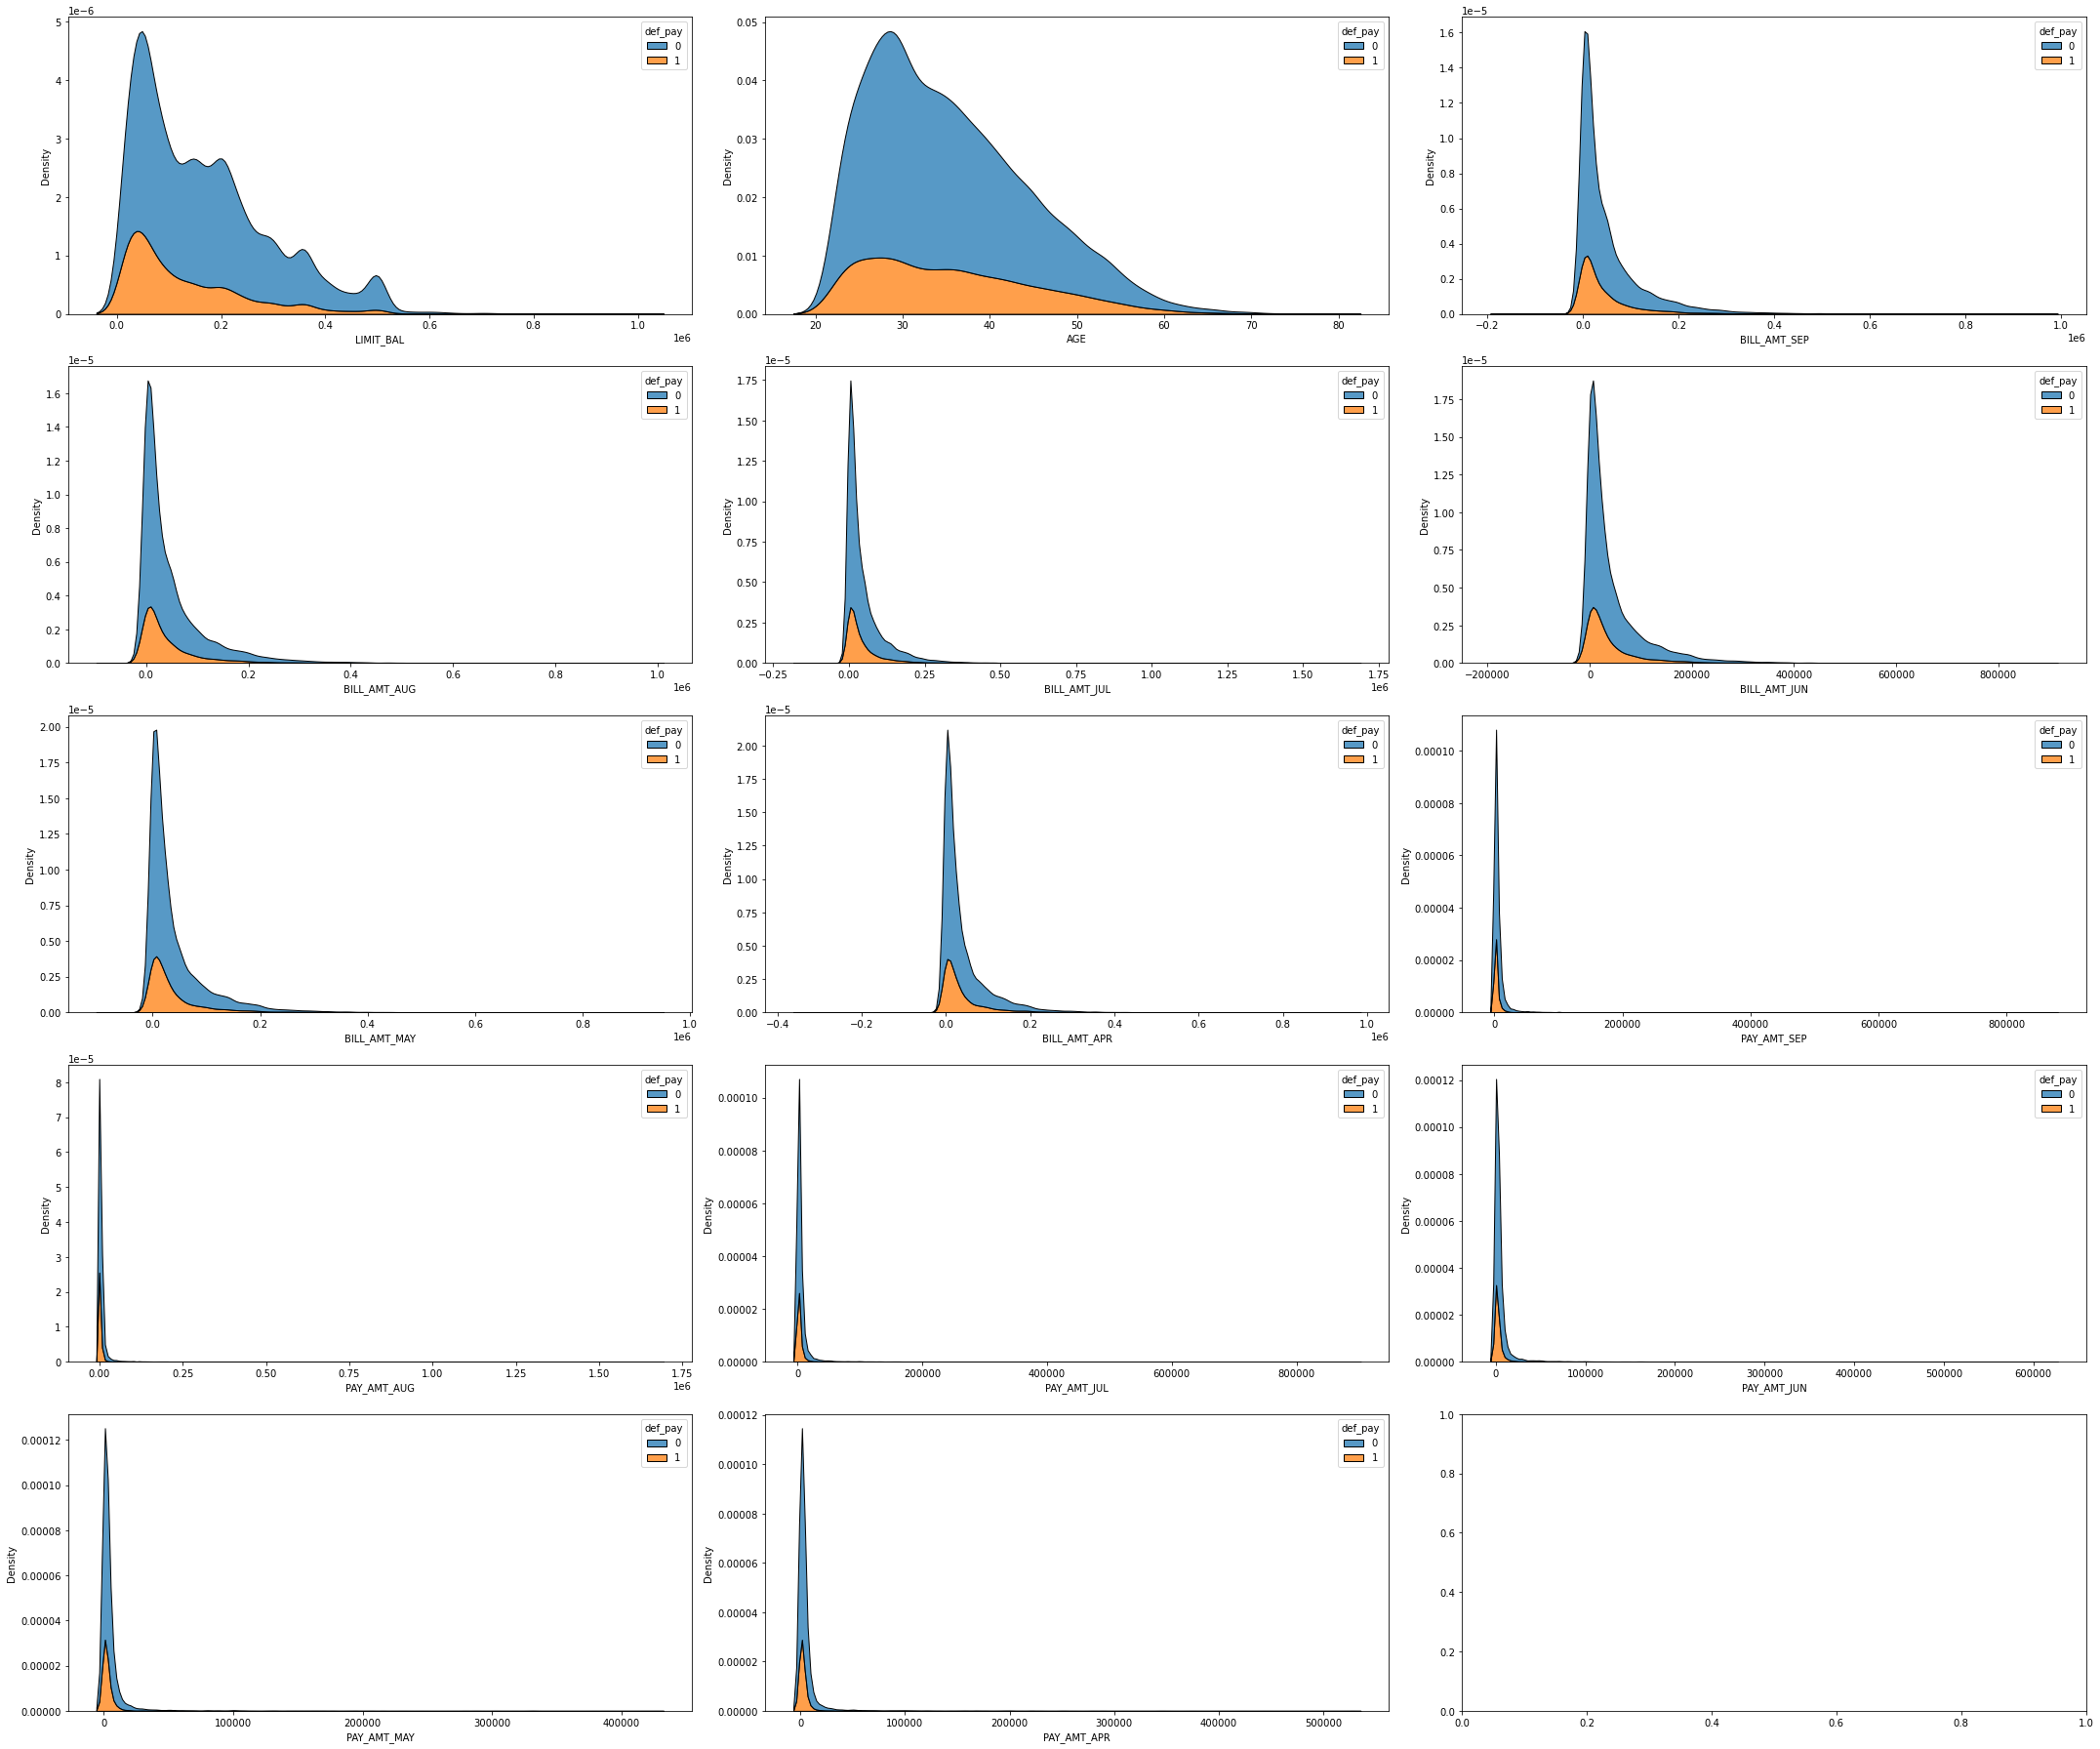

In [19]:
num_dist(num_data)

**Observations**
- The numerical columns denominated in dollars have very large ranges. This could cause problems when training a predictive model (e.g. linear regression).
- Though there are no clear trends in the above bill amount and plot amount plots it can be seen that they all have a similar distribution among both the default and non-default clients. Given that they are all right-skewed with high peaks (positive kurtosis) we can interpret this as there being more values to the right of the distribution containing mostly positive values. Very few instances of negative balances in any month, which makes sense given the data set contains very few defaults compared to non-defaults.
- The above interpretation is true for the payment amount plots as well.

In [20]:
num_data.append(target)

In [22]:
corr = data[num_data].corr()

<AxesSubplot:>

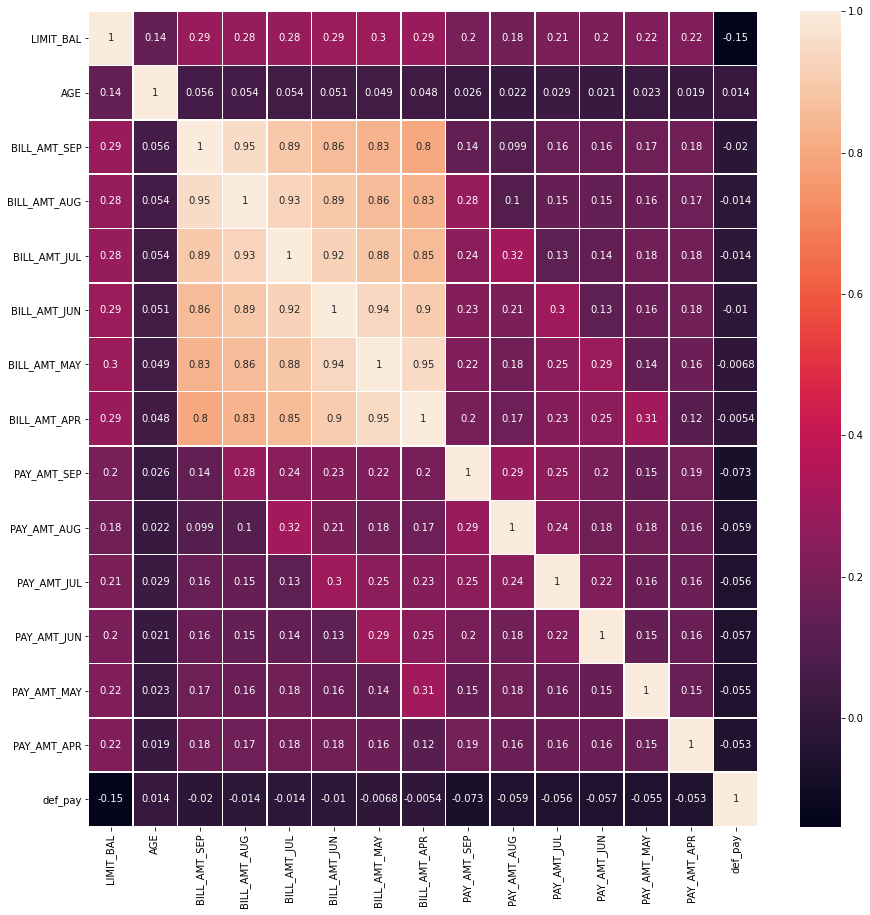

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(15,15))
sns.heatmap(corr, annot = True, linewidths=.5)

**Observations**
- The bill amount variables are all highly correlated.
- None of the numerical variables seem to show any correlation with the target. They may not be good predictors